In [18]:
import os

import torch
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt

cwd = os.getcwd()

if torch.cuda.is_available():
    reader = easyocr.Reader(['en'], gpu=True)
    print(f"GPU in use: {torch.cuda.get_device_name(0)}")

else:
    reader = easyocr.Reader(['en'], gpu=False)
    print("using CPU, CUDA not available")

GPU in use: NVIDIA GeForce RTX 4060 Laptop GPU


In [22]:
IMAGE_PATH = (f"{cwd}\images\8_12.webp")
IMAGE_PATH

'C:\\Users\\aidan\\OneDrive\\Desktop\\Robotics\\easyocr\\images\\8_12.webp'

In [23]:
result = reader.readtext(IMAGE_PATH)
result

[([[160, 602], [190, 602], [190, 656], [160, 656]], '8', 0.9998256044135054),
 ([[609, 623], [669, 623], [669, 689], [609, 689]], '8', 1.0),
 ([[350.2823305043751, 497.0871061648166],
   [372.3589550164673, 510.14653534420427],
   [334.7176694956249, 571.9128938351834],
   [311.6410449835327, 557.8534646557957]],
  '8',
  0.9620617749281024)]

final length: 3


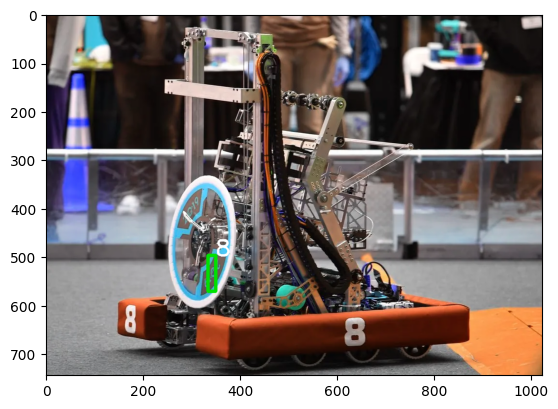

In [16]:
#Change to view different labeled parts
index_view = 2

bottom_right_list = list()
top_left_list = list()
index_list = list()
answer_list = list()

if not result:
    print("Empty Results List")

else:
    for index, item in enumerate(result):
        if result[index][1].isdigit():
            bottom_right_list.append(tuple(result[index][0][2]))
            top_left_list.append(tuple(result[index][0][0]))
            answer_list.append(result[index][1])
        else:
            print(f"discarding: {result[index][1]}")

print(f"final length: {len(answer_list)}")

font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, tuple(map(int, top_left_list[index_view])), tuple(map(int, bottom_right_list[index_view])), (0, 225, 0), 5)
img = cv2.putText(img, answer_list[index_view], tuple(map(int, top_left_list[index_view])), font, 1.5, (255, 255, 255), 3)
plt.imshow(img)
plt.show()